### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [26]:
data = pd.read_csv('data/coupons.csv')

In [27]:
pd.set_option('display.max_columns', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [29]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# print all unique values of all columns to get a better idea of the dataset
for col in data.columns:
    print(col, data[col].unique())

# data anomalies:
# - typo in "passanger" column (should be "passenger")
# - car column has value "Car that is too old to install Onstar :D", which is likely an outlier
# - ambiguous column name "Y"

destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
temperature [55 80 30]
time ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Female' 'Male']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children [1 0]
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 

In [31]:
# check data for nulls/NaNs
data.isnull().sum()

# NaNs: car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [32]:
# first, let's fix the typo and change Y to be more descriptive:
data.rename(columns={'passanger' : 'passenger', 'Y' : 'coupon_accepted'}, inplace=True)

In [33]:
# now to fix the NaNs:
# we can see that the car column has so many NaNs that it would be more worth it to drop the whole column,
# as it doesn't provide enough data to draw any meaningful conclusions from. (12576 out of 12684 values are NaN!)
data.drop('car', axis=1, inplace=True)

# as for the Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 columns,
# let's replace the NaNs with the value 'never', which also exists in each of those columns.
data.fillna('never', inplace=True)

4. What proportion of the total observations chose to accept the coupon?



In [34]:
total_drivers_accepted = len(data.query('coupon_accepted == 1'))
proportion_drivers_accepted = total_drivers_accepted / len(data)

print('The proportion of drivers who accepted the coupon is:', '{0:.2%}'.format(proportion_drivers_accepted))

The proportion of drivers who accepted the coupon is: 56.84%


5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(20-50)'),
  Text(1, 0, 'Bar'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Restaurant(<20)'),
  Text(4, 0, 'Coffee House')])

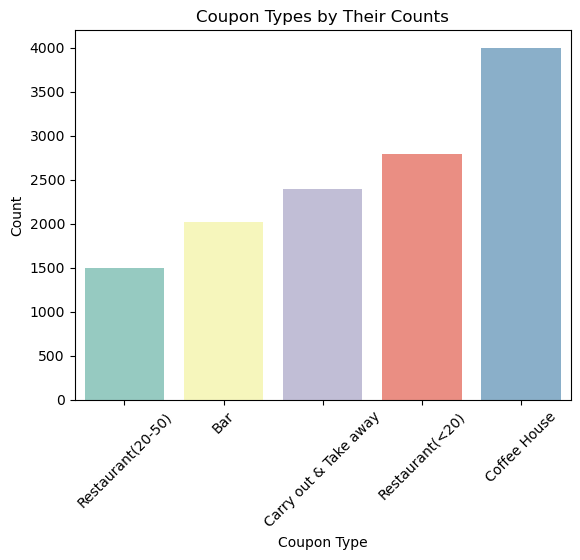

In [35]:
# first, count how many of each coupon there is and put it in a new dataframe
coupon_counts = data['coupon'].value_counts().sort_values().reset_index()

# plot the coupon types vs their counts with seaborn
coupon_barplot = sns.barplot(data=coupon_counts, x='coupon', y='count', hue='coupon', legend=False, palette='Set3')
coupon_barplot.set_title('Coupon Types by Their Counts')
coupon_barplot.set_xlabel('Coupon Type')
coupon_barplot.set_ylabel('Count')
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


Text(0.5, 0, 'Temperature')

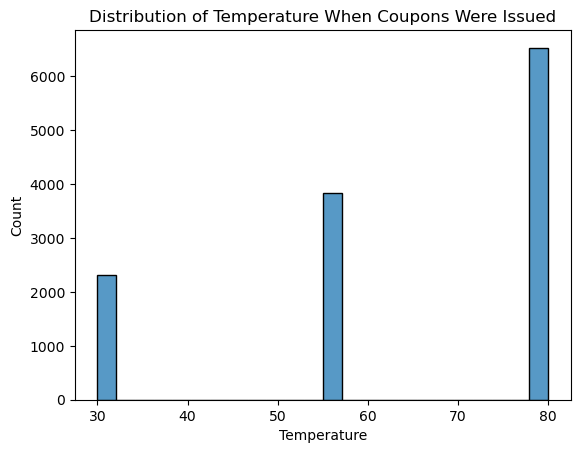

In [36]:
# plotting the histogram of temperature first
print(data['temperature'].value_counts())
temperature_histogram = sns.histplot(data=data, x='temperature')
temperature_histogram.set_title('Distribution of Temperature When Coupons Were Issued')
temperature_histogram.set_xlabel('Temperature')

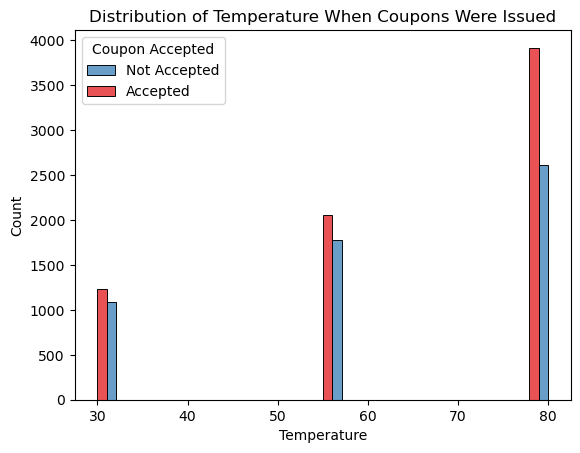

In [37]:
# afterwards, adding hue to a secondary graph to show how many people accepted or didn't accept at a given temperature
temperature_histogram_by_acceptance = sns.histplot(data=data, x='temperature', hue='coupon_accepted', hue_order=[1, 0], multiple='dodge', palette='Set1')
temperature_histogram_by_acceptance.set_title('Distribution of Temperature When Coupons Were Issued')
temperature_histogram_by_acceptance.set_xlabel('Temperature')

plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [38]:
bar_data = data.query('coupon == "Bar"')

bar_data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_accepted
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [39]:
# total bar coupons accepted / total bar coupons issued
total_bar_coupons_accepted = len(bar_data.query('coupon_accepted == 1'))
proportion_bar_coupons_accepted = total_bar_coupons_accepted / len(bar_data)

print('The proportion of bar coupons which were accepted is:', '{0:.2%}'.format(proportion_bar_coupons_accepted))

The proportion of bar coupons which were accepted is: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [40]:
# acceptance rate of those who went to a bar ≤3 times a month
# includes Bar values: 'never', 'less1', '1~3'
bar_visits_le_3 = ['never', 'less1', '1~3']
bar_data_le3 = bar_data.query('Bar in @bar_visits_le_3')
bar_data_le3_accepted = bar_data_le3.query('coupon_accepted == 1')
proportion_bar_coupons_accepted_le3 = len(bar_data_le3_accepted) / len(bar_data_le3)

print(
    'The proportion of bar coupons which were accepted by those who visit bars 3 or fewer times per month is:',
    '{0:.2%}'.format(proportion_bar_coupons_accepted_le3)
)

# acceptance rate of those who went to a bar >3 times a month
# includes Bar values: '4~8', 'gt8'
bar_visits_gt_3 = ['4~8', 'gt8']
bar_data_gt3 = bar_data.query('Bar in @bar_visits_gt_3')
bar_data_gt3_accepted = bar_data_gt3.query('coupon_accepted == 1')
proportion_bar_coupons_accepted_gt3 = len(bar_data_gt3_accepted) / len(bar_data_gt3)

print(
    'The proportion of bar coupons which were accepted by those who visit bars more than 3 times per month is:',
    '{0:.2%}'.format(proportion_bar_coupons_accepted_gt3)
)

# We have 37.07% acceptance vs 76.88% acceptance
proportional_difference_between_acceptance_rates = abs(proportion_bar_coupons_accepted_gt3 - proportion_bar_coupons_accepted_le3)

print()
print(f'Those who go to a bar more than 3 times per month are \
{'{0:.2%}'.format(proportional_difference_between_acceptance_rates)} more likely to accept a bar coupon than those who go less often')

The proportion of bar coupons which were accepted by those who visit bars 3 or fewer times per month is: 37.07%
The proportion of bar coupons which were accepted by those who visit bars more than 3 times per month is: 76.88%

Those who go to a bar more than 3 times per month are 39.81% more likely to accept a bar coupon than those who go less often


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [41]:
# acceptance rate of those who went to a bar >1 time a month and are over age 25
# includes Bar values: '1~3', '4~8', 'gt8'
# includes age values: '26', '31', '36', '41', '46', '50plus'
bar_visits_gt_1 = ['1~3', '4~8', 'gt8']
age_gt_25 = ['26', '31', '36', '41', '46', '50plus']
bar_data_visit_gt1_age_gt25 = bar_data.query('Bar in @bar_visits_gt_1 and age in @age_gt_25')
bar_data_visit_gt1_age_gt25_accepted = bar_data_visit_gt1_age_gt25.query('coupon_accepted == 1')
proportion_bar_coupons_accepted_visit_gt1_age_gt25 = len(bar_data_visit_gt1_age_gt25_accepted) / len(bar_data_visit_gt1_age_gt25)

print(
    'The proportion of bar coupons which were accepted by those over age 25 who visit bars more than once a month is:',
    '{0:.2%}'.format(proportion_bar_coupons_accepted_visit_gt1_age_gt25)
)

# acceptance rate of all the others
# includes Bar values: 'never', 'less1'
# includes age values: 'below21', '21'
bar_visits_le_1 = ['never', 'less1']
age_le_25 = ['below21', '21']
bar_data_visit_le1_age_le25 = bar_data.query('Bar in @bar_visits_le_1 and age in @age_le_25')
bar_data_visit_le1_age_le25_accepted = bar_data_visit_le1_age_le25.query('coupon_accepted == 1')
proportion_bar_coupons_accepted_visit_le1_age_le25 = len(bar_data_visit_le1_age_le25_accepted) / len(bar_data_visit_le1_age_le25)

print(
    'The proportion of bar coupons which were accepted by all the others is:',
    '{0:.2%}'.format(proportion_bar_coupons_accepted_visit_le1_age_le25)
)

# We have 69.52% acceptance vs 39.33% acceptance
proportional_difference_between_acceptance_rates_2 = abs(
    proportion_bar_coupons_accepted_visit_le1_age_le25 - proportion_bar_coupons_accepted_visit_gt1_age_gt25
)

print()
print(f'Those over age 25 who visit bars more than once a month are \
{'{0:.2%}'.format(proportional_difference_between_acceptance_rates_2)} more likely to accept a bar coupon than others')

The proportion of bar coupons which were accepted by those over age 25 who visit bars more than once a month is: 69.52%
The proportion of bar coupons which were accepted by all the others is: 39.33%

Those over age 25 who visit bars more than once a month are 30.19% more likely to accept a bar coupon than others


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [42]:
# acceptance rate of those who went to a bar >1 time a month, non-kid passengers, occupation outside farming/fishing/forestry
# includes Bar values: '1~3', '4~8', 'gt8'
# includes passenger values: 'Friend(s)' 'Partner'
# includes occupation not equal to 'Farming Fishing & Forestry'
non_kid_passenger = ['Friend(s)', 'Partner']
bar_data_adult_passenger = bar_data.query(
    'Bar in @bar_visits_gt_1 and passenger in @non_kid_passenger and occupation != "Farming Fishing & Forestry"'
)
bar_data_adult_passenger_accepted = bar_data_adult_passenger.query('coupon_accepted == 1')
proportion_bar_coupons_accepted_adult_passenger = len(bar_data_adult_passenger_accepted) / len(bar_data_adult_passenger)

print(
    'The proportion of bar coupons which were accepted by drivers who visit bars more than once a month,',
    '\nwith non-child passengers, and occupations outside farming/fishing/forestry is:',
    '{0:.2%}'.format(proportion_bar_coupons_accepted_adult_passenger)
)

# acceptance rate of all the others
# includes Bar values: 'never', 'less1'
# includes passenger values: 'Alone', 'Kid(s)'
# includes occupation equal to 'Farming Fishing & Forestry'
kid_passenger_or_alone = ['Alone', 'Kid(s)']
bar_data_child_passenger = bar_data.query(
    'Bar in @bar_visits_le_1 and passenger in @kid_passenger_or_alone and occupation == "Farming Fishing & Forestry"'
)
bar_data_child_passenger_accepted = bar_data_child_passenger.query('coupon_accepted == 1')
proportion_bar_coupons_accepted_child_passenger = len(bar_data_child_passenger_accepted) / len(bar_data_child_passenger)

print()
print(
    'The proportion of bar coupons which were accepted by all the others is:',
    '{0:.2%}'.format(proportion_bar_coupons_accepted_child_passenger)
)

# We have 71.79% acceptance vs 50.00% acceptance
proportional_difference_between_acceptance_rates_3 = abs(
    proportion_bar_coupons_accepted_child_passenger - proportion_bar_coupons_accepted_adult_passenger
)

print()
print(f'Those who visit bars more than once a month with adult passengers and who have occupations outside \nFarming Fishing & Forestry are \
{'{0:.2%}'.format(proportional_difference_between_acceptance_rates_2)} more likely to accept a bar coupon than others')

The proportion of bar coupons which were accepted by drivers who visit bars more than once a month, 
with non-child passengers, and occupations outside farming/fishing/forestry is: 71.79%

The proportion of bar coupons which were accepted by all the others is: 50.00%

Those who visit bars more than once a month with adult passengers and who have occupations outside 
Farming Fishing & Forestry are 30.19% more likely to accept a bar coupon than others


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [43]:
# go to bar > once per month, non-child passengers, not widowed
# maritalStatus equal to 'Widowed'
bar_data_group1 = bar_data.query('Bar in @bar_visits_gt_1 and passenger in @non_kid_passenger and maritalStatus != "widowed"')
bar_data_group1_accepted = bar_data_group1.query('coupon_accepted == 1')
proportion_bar_coupons_accepted_group1 = len(bar_data_group1_accepted) / len(bar_data_group1)

print(
    'The proportion of bar coupons which were accepted by drivers who visit bars more than once a month,',
    '\nwith non-child passengers, and who were not widowed is:',
    '{0:.2%}'.format(proportion_bar_coupons_accepted_group1),
    '\n'
)

# go to bar > once per month, under age 30
# includes age values: 'below21', '21', '26'
age_lt_30 = ['below21', '21', '26']
bar_data_group2 = bar_data.query('Bar in @bar_visits_gt_1 and age in @age_lt_30')
bar_data_group2_accepted = bar_data_group2.query('coupon_accepted == 1')
proportion_bar_coupons_accepted_group2 = len(bar_data_group2_accepted) / len(bar_data_group2)

print(
    'The proportion of bar coupons which were accepted by drivers who visit bars more than once a month,',
    '\nand are under age 30 is:',
    '{0:.2%}'.format(proportion_bar_coupons_accepted_group2),
    '\n'
)

# go to cheap restaurants > 4 times per month, income < $50,000
# includes RestaurantLessThan20: '4~8', 'gt8'
# includes income: 'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'
cheap_restaurants_gt4 = ['4~8', 'gt8']
income_lt_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

bar_data_group3 = bar_data.query('RestaurantLessThan20 in @cheap_restaurants_gt4 and income in @income_lt_50k')
bar_data_group3_accepted = bar_data_group3.query('coupon_accepted == 1')
proportion_bar_coupons_accepted_group3 = len(bar_data_group3_accepted) / len(bar_data_group3)

print(
    'The proportion of bar coupons which were accepted by drivers who visit cheap restaurants more than 4 times a month,',
    '\nand make less than $50,000 per year is:',
    '{0:.2%}'.format(proportion_bar_coupons_accepted_group3)
)

The proportion of bar coupons which were accepted by drivers who visit bars more than once a month, 
with non-child passengers, and who were not widowed is: 71.79% 

The proportion of bar coupons which were accepted by drivers who visit bars more than once a month, 
and are under age 30 is: 72.17% 

The proportion of bar coupons which were accepted by drivers who visit cheap restaurants more than 4 times a month, 
and make less than $50,000 per year is: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

It would appear that, regardless of other factors, a driver is more likely to accept a bar coupon if they tend to visit bars more than once a month. This is supported by the fact that all acceptance rates for drivers that meet this condition tend towards 70% or higher.

Thus, it is recommended that bar coupons be targeted towards drivers who visit bars at least somewhat frequently, as they will be more likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  